In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dim)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [4]:
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dim, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [6]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        running_loss = 0
        for x, y in data:
            x = x.to(device)
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum()
            running_loss += loss.item()
            loss.backward()
            opt.step()

        print(f"Epoch: {epoch} - Loss: {running_loss/len(data)}") # Avg loss in epoch
    return autoencoder

In [7]:
latent_dim = 2
autoencoder = Autoencoder(latent_dim).to(device)

data = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data',
               transform=torchvision.transforms.ToTensor(),
               download=True),
        batch_size=256,
        shuffle=True)

autoencoder = train(autoencoder, data)

d:\Softwares\miniconda3\envs\pytorch_env\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Epoch: 0 - Loss: 12253.739966339761
Epoch: 1 - Loss: 10090.87531790226
Epoch: 2 - Loss: 9641.580479138962
Epoch: 3 - Loss: 9337.987107297207
Epoch: 4 - Loss: 9145.100598404255
Epoch: 5 - Loss: 9003.572741439495
Epoch: 6 - Loss: 8890.294439827128
Epoch: 7 - Loss: 8795.978176944815
Epoch: 8 - Loss: 8712.976780668218
Epoch: 9 - Loss: 8641.230699384974
Epoch: 10 - Loss: 8582.312657912234
Epoch: 11 - Loss: 8528.161550448804
Epoch: 12 - Loss: 8477.927975398936
Epoch: 13 - Loss: 8430.432436419547
Epoch: 14 - Loss: 8395.200914228724
Epoch: 15 - Loss: 8359.893372880651
Epoch: 16 - Loss: 8320.243128740027
Epoch: 17 - Loss: 8284.42009225399
Epoch: 18 - Loss: 8250.178764960106
Epoch: 19 - Loss: 8223.323865525266


In [8]:
def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

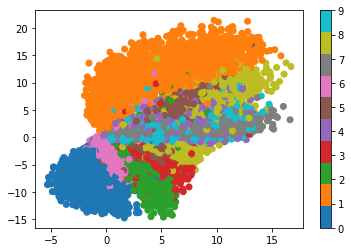

In [9]:
plot_latent(autoencoder, data)

In [10]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

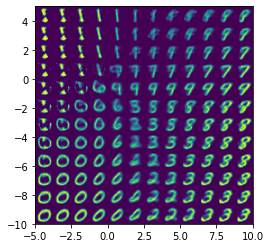

In [11]:
plot_reconstructed(autoencoder)

In [12]:
for i in data:
    print(i[0].shape)
    print(i[0][0].shape)
    x = i[0][0]
    print(x.flatten().shape)
    print(x.flatten(start_dim=1).shape)
    break

torch.Size([256, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([784])
torch.Size([1, 784])
